# 1 CARGA LIBRERIAS

In [38]:
# Celda para importar las librerias necesarias
import numpy as np
import pandas as pd
import sklearn
import time
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DE DATOS

In [39]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Cargar el dataset
airbnbData = pd.read_csv("/content/drive/MyDrive/Keepcoding_DL/data_KC.csv", sep=';')
# Comprobar el tamaño
print(airbnbData.shape)
# Separación del data set en training y testing
airbnb_tr, airbnb_test = train_test_split(airbnbData, test_size=0.2, shuffle=True, random_state=42)
airbnb_train, airbnb_val = train_test_split(airbnb_tr, test_size=0.2, shuffle=True, random_state=42)

index_train = airbnb_train.index
index_val = airbnb_val.index
index_test = airbnb_test.index

# Comprobamos la dimensionalidad de los dos dataset
print(f'Dimensiones del dataset de training: {airbnb_train.shape}')
print(f'Dimensiones del dataset de validation: {airbnb_val.shape}')
print(f'Dimensiones del dataset de test: {airbnb_test.shape}')

# Guardamos Training y testing en csv separados
airbnb_train.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_train.csv', sep=';', decimal='.', index=False)
airbnb_test.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test.csv', sep=';', decimal='.', index=False)
airbnb_val.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val.csv', sep=';', decimal='.', index=False)

# Guardar los index

np.save('/content/drive/MyDrive/Keepcoding_DL/index_train.npy', index_train)
np.save('/content/drive/MyDrive/Keepcoding_DL/index_val.npy', index_val)
np.save('/content/drive/MyDrive/Keepcoding_DL/index_test.npy', index_test)

(2135, 30)
Dimensiones del dataset de training: (1366, 30)
Dimensiones del dataset de validation: (342, 30)
Dimensiones del dataset de test: (427, 30)


# 3. ANALISIS DE TRAIN

## 3.1. CARGA DE TRAIN

In [41]:
# Cargar el dataset
airbnbData = pd.read_csv("/content/drive/MyDrive/Keepcoding_DL/airbnb_train.csv", sep=';')
# Comprobar el tamaño
print(airbnbData.shape)
airbnbData.head(5).T

(1366, 30)


,0,1,2,3,4
id,15656661,5315955,13014320,16425115,6327222
log_price,5.010635,5.521461,5.686975,4.60517,5.298317
property_type,Apartment,Apartment,Apartment,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
amenities,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,""Wireless Internet"",""Air conditioning"",Kit...","{TV,""Cable TV"",""Wireless Internet"",""Air condit...","{Internet,""Wireless Internet"",""Air conditionin..."
accommodates,5,4,3,3,2
bathrooms,1.5,1.0,1.5,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,moderate,strict,flexible,moderate,moderate
cleaning_fee,True,True,False,True,True


## 3.2. DESCRIPCION DE TRAIN:

Visualización de las columnas, tipos etc...

In [42]:
# Ver las columnas que hay
airbnbData.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Price'],
      dtype='object')

In [43]:
# Vemos la información de las características, tipo de datos, número de registros no nulos
airbnbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1366 non-null   int64  
 1   log_price               1366 non-null   float64
 2   property_type           1366 non-null   object 
 3   room_type               1366 non-null   object 
 4   amenities               1366 non-null   object 
 5   accommodates            1366 non-null   int64  
 6   bathrooms               1361 non-null   float64
 7   bed_type                1366 non-null   object 
 8   cancellation_policy     1366 non-null   object 
 9   cleaning_fee            1366 non-null   bool   
 10  city                    1366 non-null   object 
 11  description             1366 non-null   object 
 12  first_review            1047 non-null   object 
 13  host_has_profile_pic    1360 non-null   object 
 14  host_identity_verified  1360 non-null   

## 3.3. COLUMNA AMENITIES
Tratamos la columna amenities haciendo un conteo de las mismas.

In [44]:
# Tratar la columna amenities como un conteo del número de aminities que tiene
airbnbData['amenities_num'] = airbnbData['amenities'].apply(lambda x: len(x.split(',')))

## 3.4. ANALISIS DESCRIPTIVO DE LOS DATOS


In [45]:
airbnbData.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Price,amenities_num
count,1.366000e+03,1366.000000,1366.000000,1361.000000,1366.000000,1366.000000,1366.000000,1032.000000,1364.000000,1364.000000,1366.00000,1366.00000
mean,1.132214e+07,4.762580,2.983163,1.189199,38.634389,-91.599234,19.141288,93.836240,1.206012,1.628299,154.74817,17.13470
std,6.169867e+06,0.689970,2.025228,0.469693,2.975999,21.884556,36.017758,9.705225,0.763776,1.165205,161.16652,6.91938
min,1.664100e+04,2.890372,1.000000,0.000000,33.343574,-122.508663,0.000000,20.000000,0.000000,1.000000,18.00000,1.00000
25%,6.145474e+06,4.317488,2.000000,1.000000,34.180153,-118.347720,1.000000,92.000000,1.000000,1.000000,75.00000,13.00000
50%,1.279347e+07,4.691348,2.000000,1.000000,40.676951,-74.002241,5.000000,96.000000,1.000000,1.000000,109.00000,17.00000
75%,1.645553e+07,5.164786,4.000000,1.000000,40.741366,-73.951294,20.000000,100.000000,1.000000,2.000000,175.00000,21.00000
max,2.118810e+07,7.467371,16.000000,5.500000,42.382883,-70.991861,318.000000,100.000000,6.000000,16.000000,1750.00000,57.00000


Como hay pocos registros vamos a trabajar con todos aunque he hecho un estudio y podríamos quitar algún outliner.

Voy a usar la columna de log_price y eliminar Price que son el mismo dato tratado previamente.

Voy a eliminar algunas características que me llevaría tiempo tratar y analizar como descripción, la url y algunas con datos faltantes pero que tiene datos de ubicación que ya nos dan otras columnas como longitud y latitud.

## 3.5. Estudio de variables categóricas.
A. PROPERTY_TYPE

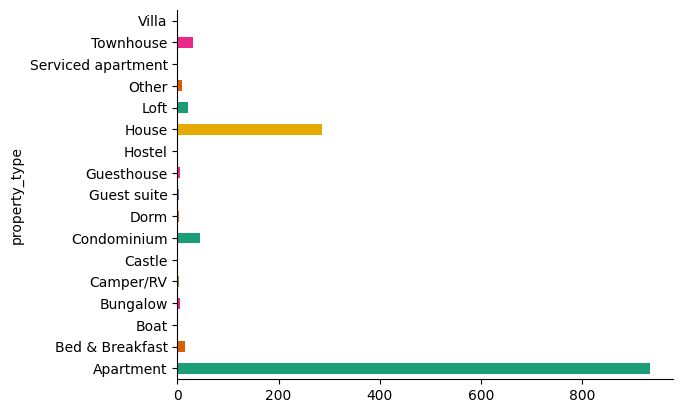

In [46]:
# Tratamos la columna Property_type
airbnbData.groupby('property_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Observamos que algunas propiedades tienen pocas muestras, vamos a juntar aquellas que tienen 5 o menos concurrencias con la clasificación 'Other'.

In [47]:
# Observamos que hay algunas propiedades con pocas muestras las unimos todas con la opción Other
concurrencias_proptype = airbnbData['property_type'].value_counts()
few_conc = concurrencias_proptype[concurrencias_proptype <= 5].index
airbnbData.loc[airbnbData['property_type'].isin(few_conc), 'property_type'] = 'Other'

concurrencias_proptype = airbnbData['property_type'].value_counts()
print(concurrencias_proptype)

property_type
Apartment          934
House              285
Condominium         45
Townhouse           30
Other               24
Loft                21
Bed & Breakfast     15
Guesthouse           6
Bungalow             6
Name: count, dtype: int64


B. ROOM_TYPE

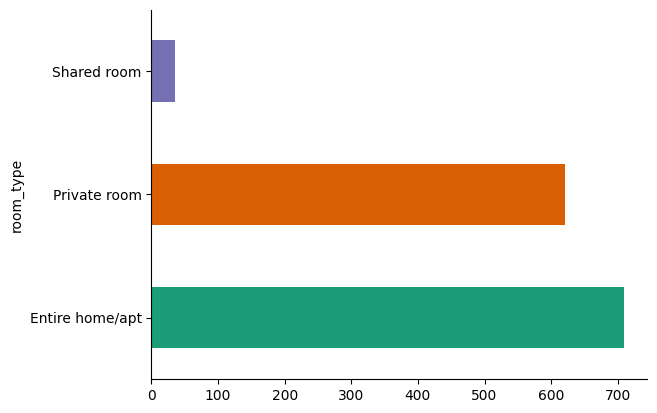

In [48]:
# Analizar la columna room type
airbnbData.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
airbnbData['room_type'].value_counts()

room_type
Entire home/apt    709
Private room       621
Shared room         36
Name: count, dtype: int64

C. BED_TYPE

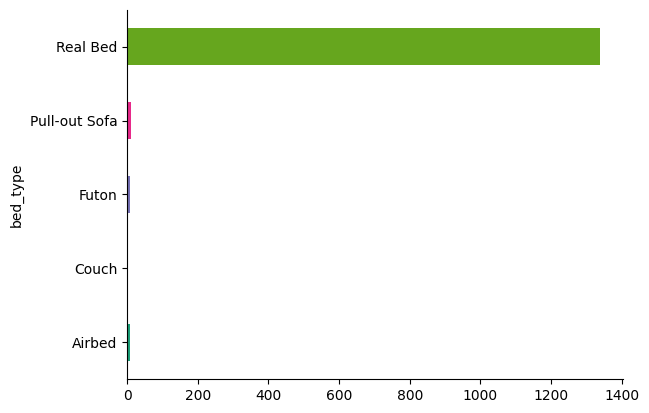

In [50]:
airbnbData.groupby('bed_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Observamos que solo Real Bed tiene muchas muestras, así que agrupamos todas las demás en una sola categoría 'other'.

In [51]:
airbnbData.loc[airbnbData['bed_type'] != 'Real Bed', 'bed_type'] = 'other'
airbnbData['bed_type'].value_counts()

bed_type
Real Bed    1337
other         29
Name: count, dtype: int64

D. CANCELLATION_POLICY

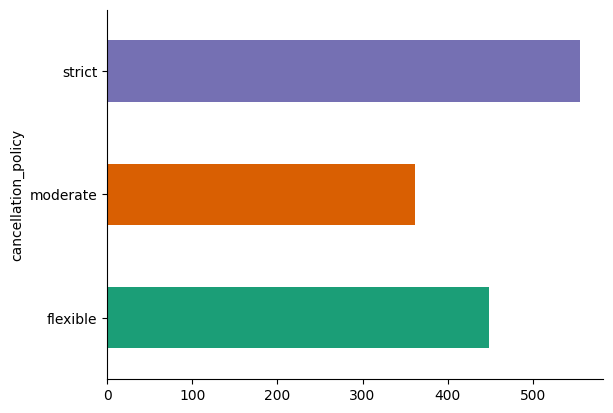

In [52]:
airbnbData.groupby('cancellation_policy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
airbnbData['cancellation_policy'].value_counts()

cancellation_policy
strict      555
flexible    449
moderate    362
Name: count, dtype: int64

En validation o test puede existir un valor más que very strict y cuando tratemos ese dato lo uniremos a strict y trabajaremos con 3 categorias.

E. CITY

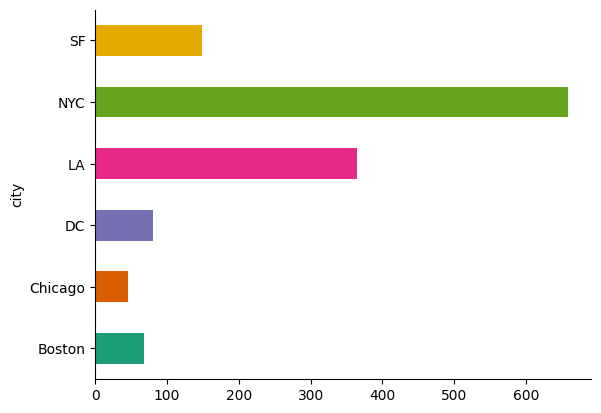

In [54]:
# Analisis columna city
airbnbData.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
airbnbData['city'].value_counts()

city
NYC        658
LA         365
SF         149
DC          80
Boston      68
Chicago     46
Name: count, dtype: int64

E. NEIGHBOURHOOD:
No lo grafico porque tiene muchos registros. Observamos que hay barrios con solo una concurrencia. Como tenemos otros valores de ubicación esta columna la vamos a eliminar.

In [56]:
airbnbData['neighbourhood'].value_counts()

neighbourhood
Williamsburg          65
Bushwick              42
Bedford-Stuyvesant    41
Upper West Side       32
Upper East Side       26
                      ..
Van Nest               1
Bay Ridge              1
Brooklyn Heights       1
Norwood Park           1
Union Square           1
Name: count, Length: 284, dtype: int64

In [57]:
# TRATAMIENTO DE NULOS
airbnbData.isna().any()

id                        False
log_price                 False
property_type             False
room_type                 False
amenities                 False
accommodates              False
bathrooms                  True
bed_type                  False
cancellation_policy       False
cleaning_fee              False
city                      False
description               False
first_review               True
host_has_profile_pic       True
host_identity_verified     True
host_response_rate         True
host_since                 True
instant_bookable          False
last_review                True
latitude                  False
longitude                 False
name                      False
neighbourhood              True
number_of_reviews         False
review_scores_rating       True
thumbnail_url             False
zipcode                    True
bedrooms                   True
beds                       True
Price                     False
amenities_num             False
dtype: b

F. INSTANT_BOOKABLE

## 3.6. TRATAMIENTO DE NULOS

Vamos a tratar las columnas que vamos a dejar porque otras por su dificultad o por no considerarlas relevantes las vamos a eliminar.

Voy a sustituir los datos faltantes por la moda en:
* bathrooms
* bedrooms
* beds
* review_scores_rating


In [58]:
# Tratar nulos
mean_bath = airbnbData['bathrooms'].mean()
airbnbData['bathrooms'].fillna(mean_bath, inplace=True)

mean_bedrooms = airbnbData['bedrooms'].mean()
airbnbData['bedrooms'].fillna(mean_bedrooms, inplace=True)

mean_beds = airbnbData['beds'].mean()
airbnbData['beds'].fillna(mean_beds, inplace=True)

mean_scores = airbnbData['review_scores_rating'].mean()
airbnbData['review_scores_rating'].fillna(mean_scores, inplace=True)

airbnbData.head().T


,0,1,2,3,4
id,15656661,5315955,13014320,16425115,6327222
log_price,5.010635,5.521461,5.686975,4.60517,5.298317
property_type,Apartment,Apartment,Apartment,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
amenities,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,""Wireless Internet"",""Air conditioning"",Kit...","{TV,""Cable TV"",""Wireless Internet"",""Air condit...","{Internet,""Wireless Internet"",""Air conditionin..."
accommodates,5,4,3,3,2
bathrooms,1.5,1.0,1.5,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,moderate,strict,flexible,moderate,moderate
cleaning_fee,True,True,False,True,True


## 3.7. CODIFICACION DE VARIABLES CATEGORICAS

In [59]:

# Codificación de variables cateogricas
origin_property_type = airbnbData['property_type'].unique()
origin_room_type = airbnbData['room_type'].unique()
origin_bed_type = airbnbData['bed_type'].unique()
origin_cancel = airbnbData['cancellation_policy'].unique()
origin_city = airbnbData['city'].unique()
origin_book = airbnbData['instant_bookable'].unique()
origin_cleaning = airbnbData['cleaning_fee'].unique()


# Inicializa LabelEncoder
encod_property_type = LabelEncoder()
encod_room_type = LabelEncoder()
encod_bed_type = LabelEncoder()
encod_cancel = LabelEncoder()
encod_city = LabelEncoder()
encod_book = LabelEncoder()
encod_cleaning = LabelEncoder()

# Ajusta y transforma tus datos codificando las columnas categóricas
airbnbData['property_type'] = encod_property_type.fit_transform(airbnbData['property_type'])
airbnbData['room_type'] = encod_room_type.fit_transform(airbnbData['room_type'])
airbnbData['bed_type'] = encod_bed_type.fit_transform(airbnbData['bed_type'])
airbnbData['cancellation_policy'] = encod_cancel.fit_transform(airbnbData['cancellation_policy'])
airbnbData['city'] = encod_city.fit_transform(airbnbData['city'])
airbnbData['instant_bookable'] = encod_book.fit_transform(airbnbData['instant_bookable'])
airbnbData['cleaning_fee'] = encod_cleaning.fit_transform(airbnbData['cleaning_fee'])

# Creamos un diccionario de mapeo para asociar la categorización al valor real.
df_asociacion_property = pd.DataFrame({'property_type_original': origin_property_type,
                              'property_type_encoded': encod_property_type.transform(origin_property_type)})

df_asociacion_roomtype = pd.DataFrame({'room_type_original': origin_room_type,
                              'room_type_encoded': encod_room_type.transform(origin_room_type)})

df_asociacion_bedtype = pd.DataFrame({'bed_type_original': origin_bed_type,
                              'bed_type_encoded': encod_bed_type.transform(origin_bed_type)})

df_asociacion_cancel = pd.DataFrame({'cancel_original': origin_cancel,
                              'cancel_encoded': encod_cancel.transform(origin_cancel)})
df_asociacion_city = pd.DataFrame({'city_original': origin_city,
                              'city_encoded': encod_city.transform(origin_city)})

# df_asociacion_neigh = pd.DataFrame({'neigh_original': origin_neighbourhood,
                             # 'neigh_encoded': encod_neighbourhood.transform(origin_neighbourhood)})

df_asociacion_book = pd.DataFrame({'book_original': origin_book,
                              'book_encoded': encod_book.transform(origin_book)})


df_asociacion_cleaning = pd.DataFrame({'cleaning_original': origin_cleaning,
                              'cleaning_encoded': encod_cleaning.transform(origin_cleaning)})



Comprobamos algunos datos para ver si se ha hecho correctamente los pasos previos.

In [60]:
print(df_asociacion_bedtype)
print(df_asociacion_cancel)
print(df_asociacion_city)
print(df_asociacion_cleaning)
print(df_asociacion_property)
print(df_asociacion_book)

  bed_type_original  bed_type_encoded
0          Real Bed                 0
1             other                 1
  cancel_original  cancel_encoded
0        moderate               1
1          strict               2
2        flexible               0
  city_original  city_encoded
0            SF             5
1           NYC             4
2            LA             3
3        Boston             0
4            DC             2
5       Chicago             1
   cleaning_original  cleaning_encoded
0               True                 1
1              False                 0
  property_type_original  property_type_encoded
0              Apartment                      0
1                  House                      5
2                   Loft                      6
3            Condominium                      3
4             Guesthouse                      4
5              Townhouse                      8
6        Bed & Breakfast                      1
7                  Other               

In [61]:
airbnbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1366 non-null   int64  
 1   log_price               1366 non-null   float64
 2   property_type           1366 non-null   int64  
 3   room_type               1366 non-null   int64  
 4   amenities               1366 non-null   object 
 5   accommodates            1366 non-null   int64  
 6   bathrooms               1366 non-null   float64
 7   bed_type                1366 non-null   int64  
 8   cancellation_policy     1366 non-null   int64  
 9   cleaning_fee            1366 non-null   int64  
 10  city                    1366 non-null   int64  
 11  description             1366 non-null   object 
 12  first_review            1047 non-null   object 
 13  host_has_profile_pic    1360 non-null   object 
 14  host_identity_verified  1360 non-null   

In [62]:
airbnbData.describe()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Price,amenities_num
count,1.366000e+03,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.00000,1366.000000,1366.000000,1366.00000,1366.00000
mean,1.132214e+07,4.762580,1.570278,0.507321,2.983163,1.189199,0.021230,1.077599,0.714495,3.424597,0.242313,38.634389,-91.599234,19.141288,93.83624,1.206012,1.628299,154.74817,17.13470
std,6.169867e+06,0.689970,2.443314,0.550342,2.025228,0.468832,0.144203,0.854111,0.451820,1.174744,0.428640,2.975999,21.884556,36.017758,8.43468,0.763216,1.164351,161.16652,6.91938
min,1.664100e+04,2.890372,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.343574,-122.508663,0.000000,20.00000,0.000000,1.000000,18.00000,1.00000
25%,6.145474e+06,4.317488,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,34.180153,-118.347720,1.000000,93.83624,1.000000,1.000000,75.00000,13.00000
50%,1.279347e+07,4.691348,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,40.676951,-74.002241,5.000000,94.00000,1.000000,1.000000,109.00000,17.00000
75%,1.645553e+07,5.164786,5.000000,1.000000,4.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,40.741366,-73.951294,20.000000,99.00000,1.000000,2.000000,175.00000,21.00000
max,2.118810e+07,7.467371,8.000000,2.000000,16.000000,5.500000,1.000000,2.000000,1.000000,5.000000,1.000000,42.382883,-70.991861,318.000000,100.00000,6.000000,16.000000,1750.00000,57.00000


## 3.8. ELIMINACION DE COLUMNAS.

### 3.8.1 Eliminación de columnas en caso de regresion.

In [63]:
# Eliminar algunas columnas
drop_columns = ['id', 'thumbnail_url', 'name', 'description', 'amenities',
                'first_review', 'last_review', 'zipcode',
                'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since',
                'Price','instant_bookable', 'neighbourhood']
airbnbData = airbnbData.drop(drop_columns, axis=1)


He elimando columnas como id, url, algunas con texto dificil de tratar, amnities porque ya tengo una nueva con su conteo, Price porque tengo el log_price y zipcode y neighbourhood porque tengo otras caracteristicas que ya aportan la ubicación. Zipcode tiene bastantes datos faltantes y neighbourhood tiene muchos barrios con una sola concurrencia.

## 3.9. MATRIZ DE CORRELACION

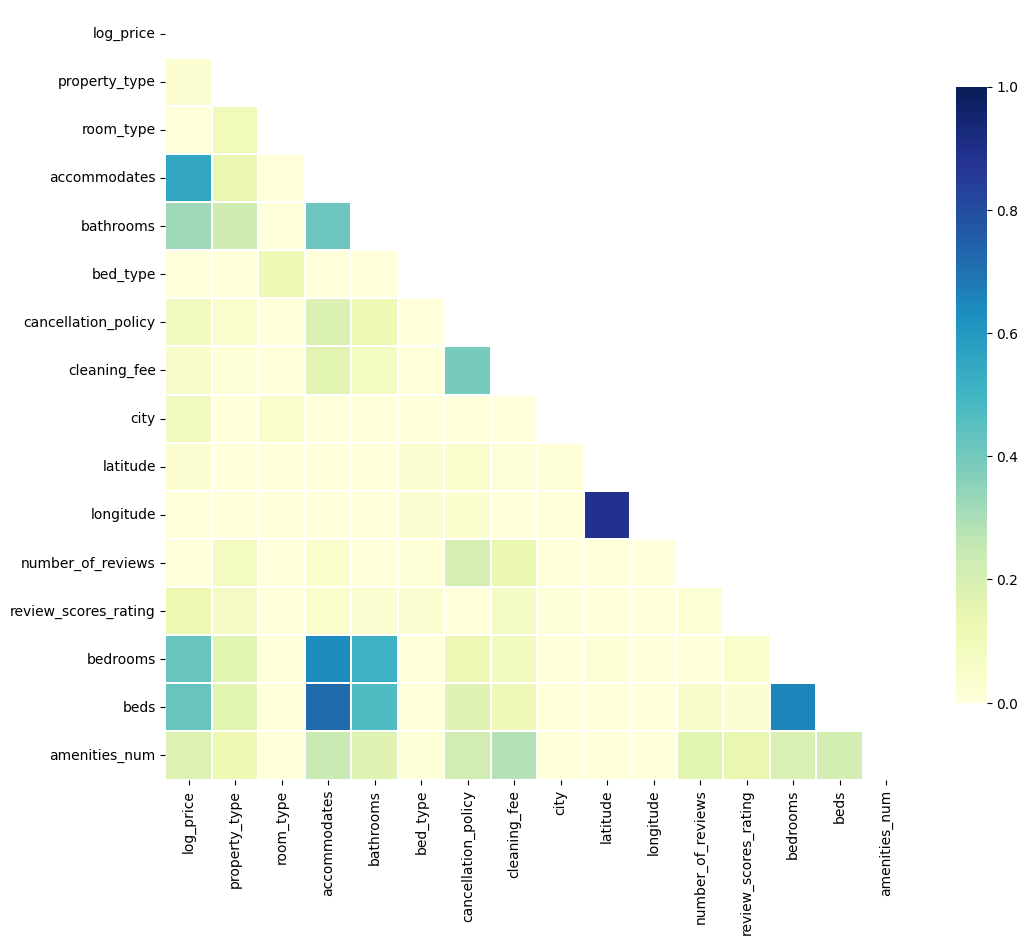

In [64]:
# Calcular la matriz de correlación
matriz_correlacion = airbnbData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matriz_correlacion, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos alta correlación entra algunas columnas como latitud y longitud y camas y accommodaes. De momento vamos a trabajar con todas las que han quedado.

# 4. LIMPIEZA FINAL DE LOS DATASETS PARA REGRESION.



## 4.1. CARGAMOS DE NUEVO LOS 3 DATASETS: TRAIN, VAL Y TEST.

In [65]:
airbnbDataTrain = pd.read_csv("/content/drive/MyDrive/Keepcoding_DL/airbnb_train.csv", sep=';')
airbnbDataVal = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val.csv', sep=';')
airbnbDataTest = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test.csv', sep=';')

In [66]:
airbnbDataTrain.head().T

,0,1,2,3,4
id,15656661,5315955,13014320,16425115,6327222
log_price,5.010635,5.521461,5.686975,4.60517,5.298317
property_type,Apartment,Apartment,Apartment,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
amenities,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,""Wireless Internet"",""Air conditioning"",Kit...","{TV,""Cable TV"",""Wireless Internet"",""Air condit...","{Internet,""Wireless Internet"",""Air conditionin..."
accommodates,5,4,3,3,2
bathrooms,1.5,1.0,1.5,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,moderate,strict,flexible,moderate,moderate
cleaning_fee,True,True,False,True,True


## 4.2. LIMPIEZA DATASET TRAIN

In [67]:
airbnbDataTrain['amenities_num'] = airbnbDataTrain['amenities'].apply(lambda x: len(x.split(',')))

concurrencias_proptype = airbnbDataTrain['property_type'].value_counts()
few_conc = concurrencias_proptype[concurrencias_proptype <= 5].index
airbnbDataTrain.loc[airbnbDataTrain['property_type'].isin(few_conc), 'property_type'] = 'Other'

airbnbDataTrain.loc[airbnbDataTrain['bed_type'] != 'Real Bed', 'bed_type'] = 'other'

# Tratar nulos
mean_bath =     airbnbDataTrain['bathrooms'].mean()
mean_bedrooms = airbnbDataTrain['bedrooms'].mean()
mean_beds =     airbnbDataTrain['beds'].mean()
mean_scores =   airbnbDataTrain['review_scores_rating'].mean()

airbnbDataTrain['bathrooms'].fillna(mean_bath, inplace=True)
airbnbDataTrain['bedrooms'].fillna(mean_bedrooms, inplace=True)
airbnbDataTrain['beds'].fillna(mean_beds, inplace=True)
airbnbDataTrain['review_scores_rating'].fillna(mean_scores, inplace=True)

# Codificación de variables cateogricas
origin_property_type = airbnbDataTrain['property_type'].unique()
origin_room_type =     airbnbDataTrain['room_type'].unique()
origin_bed_type =      airbnbDataTrain['bed_type'].unique()
origin_cancel =        airbnbDataTrain['cancellation_policy'].unique()
origin_city =          airbnbDataTrain['city'].unique()
origin_book =          airbnbDataTrain['instant_bookable'].unique()
origin_cleaning =      airbnbDataTrain['cleaning_fee'].unique()


# Inicializa el TargetEncoder
encod_property_type = LabelEncoder()
encod_room_type = LabelEncoder()
encod_bed_type = LabelEncoder()
encod_cancel = LabelEncoder()
encod_city = LabelEncoder()
encod_book = LabelEncoder()
encod_cleaning = LabelEncoder()

# Ajusta y transforma tus datos codificando las columnas categóricas
airbnbDataTrain['property_type'] = encod_property_type.fit_transform(airbnbDataTrain['property_type'])
airbnbDataTrain['room_type'] = encod_room_type.fit_transform(airbnbDataTrain['room_type'])
airbnbDataTrain['bed_type'] = encod_bed_type.fit_transform(airbnbDataTrain['bed_type'])
airbnbDataTrain['cancellation_policy'] = encod_cancel.fit_transform(airbnbDataTrain['cancellation_policy'])
airbnbDataTrain['city'] = encod_city.fit_transform(airbnbDataTrain['city'])
airbnbDataTrain['instant_bookable'] = encod_book.fit_transform(airbnbDataTrain['instant_bookable'])
airbnbDataTrain['cleaning_fee'] = encod_cleaning.fit_transform(airbnbDataTrain['cleaning_fee'])


df_asociacion_property = pd.DataFrame({'property_type_original': origin_property_type,
                              'property_type_encoded': encod_property_type.transform(origin_property_type)})

df_asociacion_roomtype = pd.DataFrame({'room_type_original': origin_room_type,
                              'room_type_encoded': encod_room_type.transform(origin_room_type)})

df_asociacion_bedtype = pd.DataFrame({'bed_type_original': origin_bed_type,
                              'bed_type_encoded': encod_bed_type.transform(origin_bed_type)})

df_asociacion_cancel = pd.DataFrame({'cancel_original': origin_cancel,
                              'cancel_encoded': encod_cancel.transform(origin_cancel)})
df_asociacion_city = pd.DataFrame({'city_original': origin_city,
                              'city_encoded': encod_city.transform(origin_city)})

df_asociacion_book = pd.DataFrame({'book_original': origin_book,
                              'book_encoded': encod_book.transform(origin_book)})


df_asociacion_cleaning = pd.DataFrame({'cleaning_original': origin_cleaning,
                              'cleaning_encoded': encod_cleaning.transform(origin_cleaning)})


drop_columns = ['id', 'thumbnail_url', 'name', 'description', 'amenities',
                'first_review', 'last_review', 'zipcode',
                'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since',
                'Price','instant_bookable', 'neighbourhood']
airbnbDataTrain = airbnbDataTrain.drop(drop_columns, axis=1)



## 4.3. DEFINICION DE LA FUNCION DE LIMPIEZA DE VAL Y TEST.

Hemos observado que en cancellation_policy hay una categoria que es super_strict_30 no vista en train. Hemos unido dicha categoria con la de strict.

Realizamos un mapeo de las variables categoricas que hemos unido y transformado en otros, y todas los casos que no están en el diccionario creado con la categorización los clasificamos con otros según su categoría.

In [68]:
#Función de limpieza test_y validation:
def clean_dataset(df):
  df['amenities_num'] = df['amenities'].apply(lambda x: len(x.split(',')))

  df['bathrooms'].fillna(mean_bath, inplace=True)
  df['bedrooms'].fillna(mean_bedrooms, inplace=True)
  df['beds'].fillna(mean_beds, inplace=True)
  df['review_scores_rating'].fillna(mean_scores, inplace=True)

  df.loc[df['cancellation_policy'] == 'super_strict_30', 'cancellation_policy'] = 'strict'
  df.loc[df['bed_type'] != 'Real Bed', 'bed_type'] = 'other'

  orig_property = set(df_asociacion_property['property_type_original'])
  orig_room = set(df_asociacion_roomtype['room_type_original'])

  mask_property = ~df['property_type'].isin(orig_property)
  mask_room = ~df['room_type'].isin(orig_room)
  # mask_neigh = ~df['neighbourhood'].isin(orig_neigh)

  df.loc[mask_property, 'property_type'] = 'Other'
  df.loc[mask_room, 'room_type'] = 'other'

  # Ajusta y transforma tus datos codificando las columnas categóricas
  df['property_type'] = encod_property_type.transform(df['property_type'])
  df['room_type'] = encod_room_type.transform(df['room_type'])
  df['bed_type'] = encod_bed_type.transform(df['bed_type'])
  df['cancellation_policy'] = encod_cancel.transform(df['cancellation_policy'])
  df['city'] = encod_city.transform(df['city'])
  df['instant_bookable'] = encod_book.transform(df['instant_bookable'])
  df['cleaning_fee'] = encod_cleaning.transform(df['cleaning_fee'])

  drop_columns = ['id', 'thumbnail_url', 'name', 'description', 'amenities', 'first_review', 'last_review', 'zipcode',
                  'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since',
                  'Price', 'neighbourhood']

  dfclean = df.drop(drop_columns, axis=1)
  return dfclean

Aplicamos la función de limpieza a los datasets de validation y test.

In [69]:
# Limpieza del dataset de validation
airbnbValClean = clean_dataset(airbnbDataVal)
# Limpieza data set Test
airbnbTestClean = clean_dataset(airbnbDataTest)

## 4.4. GUARDAMOS LOS DATASETS LIMPIOS PARA REGRESION.

De esta forma no tenemos que estar realizando continuamente la limpieza cada vez que tenemos que reejecutar el notebook.

In [70]:
airbnbDataTrain.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_train_clean.csv', sep=';', decimal='.', index=False)
airbnbValClean.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val_clean.csv', sep=';', decimal='.', index=False)
airbnbTestClean.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test_clean.csv', sep=';', decimal='.', index=False)

# 5. LIMPIEZA FINAL DE LOS DATASETS PARA CLASIFICACIÓN.



## 5.1. CARGAMOS DE NUEVO LOS 3 DATASETS: TRAIN, VAL Y TEST.

In [71]:
airbnbDataTrain = pd.read_csv("/content/drive/MyDrive/Keepcoding_DL/airbnb_train.csv", sep=';')
airbnbDataVal = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val.csv', sep=';')
airbnbDataTest = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test.csv', sep=';')

## 5.2. CREAMOS COLUMNA DE PRICE CATEGORICA CON BARATO MEDIO Y CARO

In [72]:

# Definir una función que categorice los precios
def categorize_price(price):
    if price < 75:
        return 'Barato'
    elif 75 <= price < 150:
        return 'Medio'
    else:
        return 'Caro'

# Aplicar la función a la columna 'Price' para crear la nueva columna 'Category'
airbnbDataTrain['Category_price'] = airbnbDataTrain['Price'].apply(categorize_price)
airbnbDataVal['Category_price'] = airbnbDataVal['Price'].apply(categorize_price)
airbnbDataTest['Category_price'] = airbnbDataTest['Price'].apply(categorize_price)

print(airbnbDataTrain['Category_price'].value_counts())
print(airbnbDataVal['Category_price'].value_counts())
print(airbnbDataTest['Category_price'].value_counts())


Category_price
Medio     529
Caro      466
Barato    371
Name: count, dtype: int64
Category_price
Medio     137
Caro      122
Barato     83
Name: count, dtype: int64
Category_price
Medio     170
Barato    130
Caro      127
Name: count, dtype: int64


## 5.3. LIMPIEZA DATASET TRAIN

In [73]:
airbnbDataTrain['amenities_num'] = airbnbDataTrain['amenities'].apply(lambda x: len(x.split(',')))

concurrencias_proptype = airbnbDataTrain['property_type'].value_counts()
few_conc = concurrencias_proptype[concurrencias_proptype <= 5].index
airbnbDataTrain.loc[airbnbDataTrain['property_type'].isin(few_conc), 'property_type'] = 'Other'

airbnbDataTrain.loc[airbnbDataTrain['bed_type'] != 'Real Bed', 'bed_type'] = 'other'

# Tratar nulos
mean_bath =     airbnbDataTrain['bathrooms'].mean()
mean_bedrooms = airbnbDataTrain['bedrooms'].mean()
mean_beds =     airbnbDataTrain['beds'].mean()
mean_scores =   airbnbDataTrain['review_scores_rating'].mean()

airbnbDataTrain['bathrooms'].fillna(mean_bath, inplace=True)
airbnbDataTrain['bedrooms'].fillna(mean_bedrooms, inplace=True)
airbnbDataTrain['beds'].fillna(mean_beds, inplace=True)
airbnbDataTrain['review_scores_rating'].fillna(mean_scores, inplace=True)

# Codificación de variables cateogricas
origin_property_type = airbnbDataTrain['property_type'].unique()
origin_room_type =     airbnbDataTrain['room_type'].unique()
origin_bed_type =      airbnbDataTrain['bed_type'].unique()
origin_cancel =        airbnbDataTrain['cancellation_policy'].unique()
origin_city =          airbnbDataTrain['city'].unique()
origin_book =          airbnbDataTrain['instant_bookable'].unique()
origin_cleaning =      airbnbDataTrain['cleaning_fee'].unique()


# Inicializa el TargetEncoder
encod_property_type = LabelEncoder()
encod_room_type = LabelEncoder()
encod_bed_type = LabelEncoder()
encod_cancel = LabelEncoder()
encod_city = LabelEncoder()
encod_book = LabelEncoder()
encod_cleaning = LabelEncoder()

# Ajusta y transforma tus datos codificando las columnas categóricas
airbnbDataTrain['property_type'] = encod_property_type.fit_transform(airbnbDataTrain['property_type'])
airbnbDataTrain['room_type'] = encod_room_type.fit_transform(airbnbDataTrain['room_type'])
airbnbDataTrain['bed_type'] = encod_bed_type.fit_transform(airbnbDataTrain['bed_type'])
airbnbDataTrain['cancellation_policy'] = encod_cancel.fit_transform(airbnbDataTrain['cancellation_policy'])
airbnbDataTrain['city'] = encod_city.fit_transform(airbnbDataTrain['city'])
airbnbDataTrain['instant_bookable'] = encod_book.fit_transform(airbnbDataTrain['instant_bookable'])
airbnbDataTrain['cleaning_fee'] = encod_cleaning.fit_transform(airbnbDataTrain['cleaning_fee'])


df_asociacion_property = pd.DataFrame({'property_type_original': origin_property_type,
                              'property_type_encoded': encod_property_type.transform(origin_property_type)})

df_asociacion_roomtype = pd.DataFrame({'room_type_original': origin_room_type,
                              'room_type_encoded': encod_room_type.transform(origin_room_type)})

df_asociacion_bedtype = pd.DataFrame({'bed_type_original': origin_bed_type,
                              'bed_type_encoded': encod_bed_type.transform(origin_bed_type)})

df_asociacion_cancel = pd.DataFrame({'cancel_original': origin_cancel,
                              'cancel_encoded': encod_cancel.transform(origin_cancel)})
df_asociacion_city = pd.DataFrame({'city_original': origin_city,
                              'city_encoded': encod_city.transform(origin_city)})

df_asociacion_book = pd.DataFrame({'book_original': origin_book,
                              'book_encoded': encod_book.transform(origin_book)})


df_asociacion_cleaning = pd.DataFrame({'cleaning_original': origin_cleaning,
                              'cleaning_encoded': encod_cleaning.transform(origin_cleaning)})

drop_columns = ['id', 'thumbnail_url', 'name', 'description', 'amenities',
                'first_review', 'last_review', 'zipcode',
                'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since',
                'Price','instant_bookable', 'neighbourhood', 'log_price']
airbnbDataTrain = airbnbDataTrain.drop(drop_columns, axis=1)



## 5.4. DEFINICION DE LA FUNCION DE LIMPIEZA DE VAL Y TEST.



In [74]:
#Función de limpieza test_y validation:
def clean_dataset(df):
  df['amenities_num'] = df['amenities'].apply(lambda x: len(x.split(',')))

  df['bathrooms'].fillna(mean_bath, inplace=True)
  df['bedrooms'].fillna(mean_bedrooms, inplace=True)
  df['beds'].fillna(mean_beds, inplace=True)
  df['review_scores_rating'].fillna(mean_scores, inplace=True)

  df.loc[df['cancellation_policy'] == 'super_strict_30', 'cancellation_policy'] = 'strict'
  df.loc[df['bed_type'] != 'Real Bed', 'bed_type'] = 'other'

  orig_property = set(df_asociacion_property['property_type_original'])
  orig_room = set(df_asociacion_roomtype['room_type_original'])

  mask_property = ~df['property_type'].isin(orig_property)
  mask_room = ~df['room_type'].isin(orig_room)
  # mask_neigh = ~df['neighbourhood'].isin(orig_neigh)

  df.loc[mask_property, 'property_type'] = 'Other'
  df.loc[mask_room, 'room_type'] = 'other'

  # Ajusta y transforma tus datos codificando las columnas categóricas
  df['property_type'] = encod_property_type.transform(df['property_type'])
  df['room_type'] = encod_room_type.transform(df['room_type'])
  df['bed_type'] = encod_bed_type.transform(df['bed_type'])
  df['cancellation_policy'] = encod_cancel.transform(df['cancellation_policy'])
  df['city'] = encod_city.transform(df['city'])
  df['instant_bookable'] = encod_book.transform(df['instant_bookable'])
  df['cleaning_fee'] = encod_cleaning.transform(df['cleaning_fee'])

  drop_columns = ['id', 'thumbnail_url', 'name', 'description', 'amenities', 'first_review', 'last_review', 'zipcode',
                  'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since',
                  'Price', 'neighbourhood', 'log_price']

  dfclean = df.drop(drop_columns, axis=1)
  return dfclean

Aplicamos la función de limpieza a los datasets de validation y test.

In [75]:
# Limpieza del dataset de validation
airbnbValClean = clean_dataset(airbnbDataVal)
# Limpieza data set Test
airbnbTestClean = clean_dataset(airbnbDataTest)

## 5.5. GUARDAMOS LOS DATASETS LIMPIOS.


In [76]:
airbnbDataTrain.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_train_cleanClass.csv', sep=';', decimal='.', index=False)
airbnbValClean.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val_cleanClass.csv', sep=';', decimal='.', index=False)
airbnbTestClean.to_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test_cleanClass.csv', sep=';', decimal='.', index=False)